# Homework 4 Assignment 2

Formulate a hypothesis involving categorical data, clean the data. Display the top few rows of data, display reduced dataframe and plot data distributions.

In [1]:
#As per coding convention, all imported items will be shown at the first line

#to ensure compatibility
from __future__  import print_function, division

#importing relevant packages
import pylab as pl
import pandas as pd
import numpy as np
import os
import datetime # for datawrangling

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# setting puidata, despite my bash being set up correctly 
os.environ["PUIDATA"] = "%s/001_PUI/PUIDATA"%os.getenv("HOME")
print("Path to PUIDATA", os.getenv("PUIDATA"))

Path to PUIDATA /nfshome/qg412/001_PUI/PUIDATA


In [3]:
# From homework 4 example, downloading the data
def getCitiBikeCSV(datestring):
    print ("Downloading", datestring)
    ### checking if it is already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it, use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [4]:
# Selecting the month and year of the dataset downloaded, which is june in 2016
datestring  = '201606'
getCitiBikeCSV(datestring)

file in place, you can continue


In [5]:
# Saving the downloaded dataset as df 
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

tripduration          starttime           stoptime  start station id  \
0          1470  6/1/2016 00:00:18  6/1/2016 00:24:48               380   
1           229  6/1/2016 00:00:20  6/1/2016 00:04:09              3092   
2           344  6/1/2016 00:00:21  6/1/2016 00:06:06               449   
3          1120  6/1/2016 00:00:28  6/1/2016 00:19:09               522   
4           229  6/1/2016 00:00:53  6/1/2016 00:04:42               335   

         start station name  start station latitude  start station longitude  \
0          W 4 St & 7 Ave S               40.734011               -74.002939   
1         Berry St & N 8 St               40.719009               -73.958525   
2           W 52 St & 9 Ave               40.764618               -73.987895   
3   E 51 St & Lexington Ave               40.757148               -73.972078   
4  Washington Pl & Broadway               40.729039               -73.994046   

   end station id         end station name  end station latitude  \
0            3236       W 42 St & Dyer Ave             40.758985   
1            3103      N 11 St & Wythe Ave             40.721533   
2             469       Broadway & W 53 St             40.763441   
3             401  Allen St & Rivington St             40.720196   
4             285       Broadway & E 14 St             40.734546   

   end station longitude  bikeid    usertype  birth year  gender  
0             -73.993800   19859  Subscriber      1972.0       1  
1             -73.957824   16233  Subscriber      1967.0       1  
2             -73.982681   22397  Subscriber      1989.0       1  
3             -73.989978   16231  Subscriber      1991.0       1  
4             -73.990741   15400  Subscriber      1989.0       1

# Hypothesis

**IDEA**: People tend to cycle more on Sundays than Saturdays.

**Null hypothesis**: Average bike trips for Saturday is the same or more than that of the Sunday.
        
**Alternative hypothesis**: Average bike trips for Sunday is more than that of Saturday's.

At a significance level of α=0.05

$H_0$ : Sat - Sun >= 0

$H_1$ : Sat - Sun < 0

# Understanding the data

In [6]:
# listing the columns in the data for an overview
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender'],
      dtype='object')

# Data Wrangling

In [7]:
# creating a date column that in a desired format
df['date'] = pd.to_datetime(df['starttime']) 
df.head(7)

tripduration          starttime           stoptime  start station id  \
0          1470  6/1/2016 00:00:18  6/1/2016 00:24:48               380   
1           229  6/1/2016 00:00:20  6/1/2016 00:04:09              3092   
2           344  6/1/2016 00:00:21  6/1/2016 00:06:06               449   
3          1120  6/1/2016 00:00:28  6/1/2016 00:19:09               522   
4           229  6/1/2016 00:00:53  6/1/2016 00:04:42               335   
5           946  6/1/2016 00:01:01  6/1/2016 00:16:48               503   
6          2351  6/1/2016 00:01:05  6/1/2016 00:40:16               533   

         start station name  start station latitude  start station longitude  \
0          W 4 St & 7 Ave S               40.734011               -74.002939   
1         Berry St & N 8 St               40.719009               -73.958525   
2           W 52 St & 9 Ave               40.764618               -73.987895   
3   E 51 St & Lexington Ave               40.757148               -73.972078   
4  Washington Pl & Broadway               40.729039               -73.994046   
5        E 20 St & Park Ave               40.738274               -73.987520   
6        Broadway & W 39 St               40.752996               -73.987216   

   end station id         end station name  end station latitude  \
0            3236       W 42 St & Dyer Ave             40.758985   
1            3103      N 11 St & Wythe Ave             40.721533   
2             469       Broadway & W 53 St             40.763441   
3             401  Allen St & Rivington St             40.720196   
4             285       Broadway & E 14 St             40.734546   
5             495         W 47 St & 10 Ave             40.762699   
6             386     Centre St & Worth St             40.714948   

   end station longitude  bikeid    usertype  birth year  gender  \
0             -73.993800   19859  Subscriber      1972.0       1   
1             -73.957824   16233  Subscriber      1967.0       1   
2             -73.982681   22397  Subscriber      1989.0       1   
3             -73.989978   16231  Subscriber      1991.0       1   
4             -73.990741   15400  Subscriber      1989.0       1   
5             -73.993012   25193  Subscriber      1974.0       1   
6             -74.002345   19538  Subscriber      1986.0       1   

                 date  
0 2016-06-01 00:00:18  
1 2016-06-01 00:00:20  
2 2016-06-01 00:00:21  
3 2016-06-01 00:00:28  
4 2016-06-01 00:00:53  
5 2016-06-01 00:01:01  
6 2016-06-01 00:01:05

In [8]:
#creating a new column and reclassifying them in weeknumbers to identify days
df['weeknumber'] = df['date'].apply(lambda x: x.weekday())
#df.head(7)

In [9]:
df['weeknumber'].value_counts()
# 6 is sunday and 0 is monday by default
# shows count of number of people biking each day of the week! 

2    262595
3    261553
1    209782
4    200696
0    200488
5    173908
6    151296
Name: weeknumber, dtype: int64

Observation: Sunday and Saturday's bike trips do not vary drastically from each other

In [10]:
# removing the timestamp in date and making a new column
df['date_only'] = df['date'].apply(lambda x: x.date())
df.head(7)

tripduration          starttime           stoptime  start station id  \
0          1470  6/1/2016 00:00:18  6/1/2016 00:24:48               380   
1           229  6/1/2016 00:00:20  6/1/2016 00:04:09              3092   
2           344  6/1/2016 00:00:21  6/1/2016 00:06:06               449   
3          1120  6/1/2016 00:00:28  6/1/2016 00:19:09               522   
4           229  6/1/2016 00:00:53  6/1/2016 00:04:42               335   
5           946  6/1/2016 00:01:01  6/1/2016 00:16:48               503   
6          2351  6/1/2016 00:01:05  6/1/2016 00:40:16               533   

         start station name  start station latitude  start station longitude  \
0          W 4 St & 7 Ave S               40.734011               -74.002939   
1         Berry St & N 8 St               40.719009               -73.958525   
2           W 52 St & 9 Ave               40.764618               -73.987895   
3   E 51 St & Lexington Ave               40.757148               -73.972078   
4  Washington Pl & Broadway               40.729039               -73.994046   
5        E 20 St & Park Ave               40.738274               -73.987520   
6        Broadway & W 39 St               40.752996               -73.987216   

   end station id         end station name  end station latitude  \
0            3236       W 42 St & Dyer Ave             40.758985   
1            3103      N 11 St & Wythe Ave             40.721533   
2             469       Broadway & W 53 St             40.763441   
3             401  Allen St & Rivington St             40.720196   
4             285       Broadway & E 14 St             40.734546   
5             495         W 47 St & 10 Ave             40.762699   
6             386     Centre St & Worth St             40.714948   

   end station longitude  bikeid    usertype  birth year  gender  \
0             -73.993800   19859  Subscriber      1972.0       1   
1             -73.957824   16233  Subscriber      1967.0       1   
2             -73.982681   22397  Subscriber      1989.0       1   
3             -73.989978   16231  Subscriber      1991.0       1   
4             -73.990741   15400  Subscriber      1989.0       1   
5             -73.993012   25193  Subscriber      1974.0       1   
6             -74.002345   19538  Subscriber      1986.0       1   

                 date  weeknumber   date_only  
0 2016-06-01 00:00:18           2  2016-06-01  
1 2016-06-01 00:00:20           2  2016-06-01  
2 2016-06-01 00:00:21           2  2016-06-01  
3 2016-06-01 00:00:28           2  2016-06-01  
4 2016-06-01 00:00:53           2  2016-06-01  
5 2016-06-01 00:01:01           2  2016-06-01  
6 2016-06-01 00:01:05           2  2016-06-01

In [11]:
# dropping the variables that is not of interest
df.drop(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid',
       'birth year', 'gender', 'usertype'],axis=1, inplace=True)

In [21]:
df.head()

date  weeknumber   date_only
0 2016-06-01 00:00:18           2  2016-06-01
1 2016-06-01 00:00:20           2  2016-06-01
2 2016-06-01 00:00:21           2  2016-06-01
3 2016-06-01 00:00:28           2  2016-06-01
4 2016-06-01 00:00:53           2  2016-06-01

In [24]:
# Asking the system to sum trip data for each day and adding it as a new column
new = pd.DataFrame(df.groupby([ 'date_only', 'weeknumber']).size()).reset_index()
# renaming the newly added column as count
new.columns = ['date_only', 'weekday', 'count']
new.head(7)

date_only  weekday  count
0  2016-06-01        2  54665
1  2016-06-02        3  54401
2  2016-06-03        4  38975
3  2016-06-04        5  40977
4  2016-06-05        6  22397
5  2016-06-06        0  52149
6  2016-06-07        1  51812

In [35]:
# adding back date with timestamp for plotting Figure 1 later
new['date2'] = df['date']
new.head(7)

date_only  weekday  count               date2
0  2016-06-01        2  54665 2016-06-01 00:00:18
1  2016-06-02        3  54401 2016-06-01 00:00:20
2  2016-06-03        4  38975 2016-06-01 00:00:21
3  2016-06-04        5  40977 2016-06-01 00:00:28
4  2016-06-05        6  22397 2016-06-01 00:00:53
5  2016-06-06        0  52149 2016-06-01 00:01:01
6  2016-06-07        1  51812 2016-06-01 00:01:05

In [13]:
# reducing data to have only saturday and sunday
new_satsun = new[new['weekday'] > 4]
new_satsun

date_only  weekday  count
3   2016-06-04        5  40977
4   2016-06-05        6  22397
10  2016-06-11        5  41030
11  2016-06-12        6  40637
17  2016-06-18        5  48901
18  2016-06-19        6  45270
24  2016-06-25        5  43000
25  2016-06-26        6  42992

In [14]:
# reducing data to show only overall ridership for Sat & sun
overall_satsun = pd.DataFrame(new_satsun.groupby(['weekday'])['count'].mean()).reset_index()
overall_satsun

weekday  count
0        5  43477
1        6  37824

# Plots to describe data

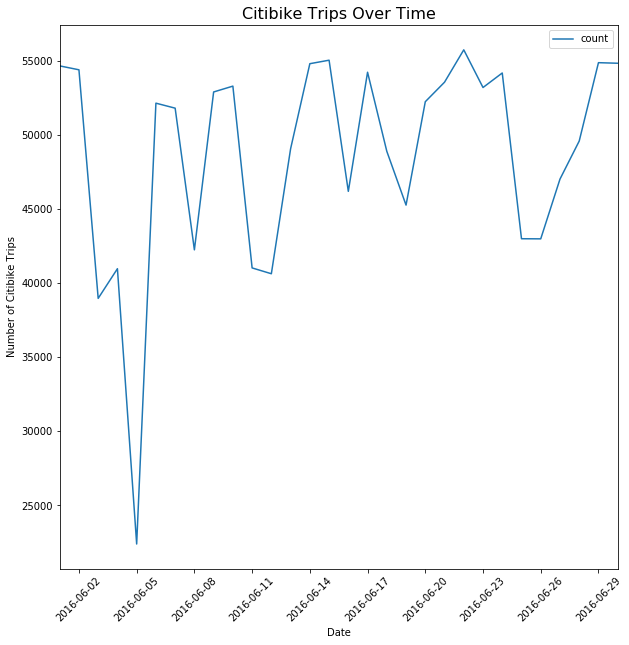

In [56]:
# Plotting overall citibike trips for everyday in June 2016

ax = new.plot(x = 'date_only', y = 'count', figsize = (10,10), rot=45)

pl.title('Citibike Trips Over Time', fontsize=16)
pl.xlabel('Date')
pl.ylabel('Number of Citibike Trips');

Figure 1: Line graph showing Citibike trips per day in June 2016. There was a sharp dip on 5th of June

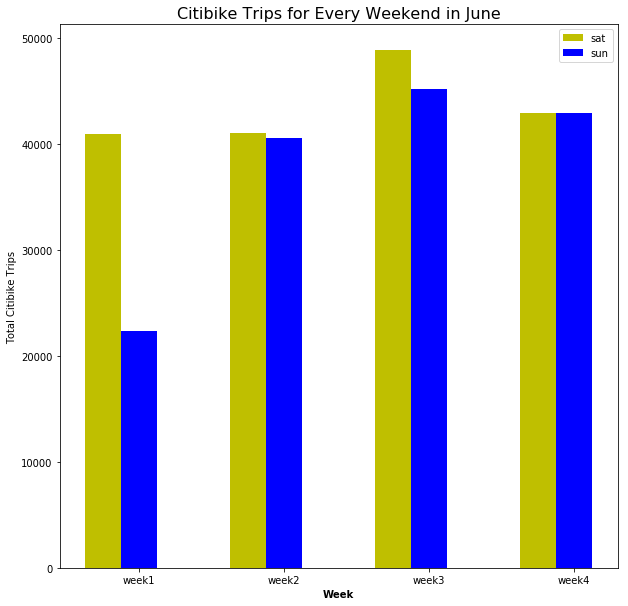

In [51]:
# credits to sam falk for sharing this code with me
# plotting bargraphs of Sat vs Sun in the month of June 2016.

plt.figure(figsize=(10,10))

sat = new_satsun[new_satsun['weekday'] == 5]['count']
sun = new_satsun[new_satsun['weekday'] == 6]['count']

barWidth = 0.25
satwidth = np.arange(len(sat))
sunwidth = [x + barWidth for x in satwidth]

plt.bar(satwidth, sat, color='y', width=barWidth, label='sat')
plt.bar(sunwidth, sun, color='b', width=barWidth, label='sun')

# Add xticks on the middle of the group bars
plt.xlabel('group', fontweight='bold')
plt.xticks([r + barWidth for r in range(len(sat))], ['week1', 'week2', 'week3', 'week4', 'week5'])

plt.title('Citibike Trips for Every Weekend in June', fontsize = 16)
plt.ylabel('Total Citibike Trips')

plt.xlabel('Week')

plt.legend()
plt.show()

Figure 2: Bar graph showing Citibikes trip count every saturday and sunday in June 2016

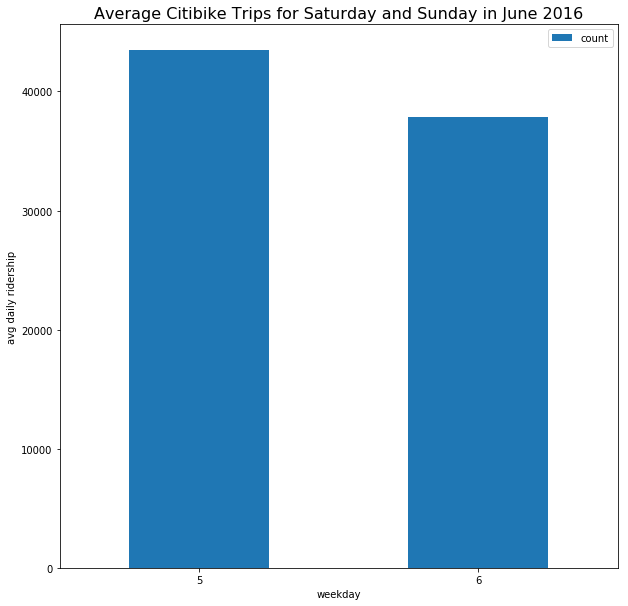

In [52]:
# plotting bar graphs for just sat and sun for June 2016
overall_satsun.plot.bar(x= 'weekday', y ='count' , rot= 0, figsize = (10,10))
plt.ylabel('avg daily ridership')
plt.title('Average Citibike Trips for Saturday and Sunday in June 2016', fontsize = 16);

Figure 3: Bar chart showing the average bike trips in Saturday and Sunday in June 2016.